<font> Imports for this code </font>

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import math
from IPython.display import HTML, display
%matplotlib inline

<font>Functions for the project are in the sections below.</font>

In [49]:
def taxifileReader(filename,sortCol,startDate,endDate):
    '''
    Reads in the taxi cab csv files into dataframes. Will also convert dates into pandas
    datetime objects and sorts the data on a given column.
    '''
    temp = pd.read_csv(filename)
    temp[startDate]=pd.to_datetime(temp[startDate],format='%d%b%y:%X')
    temp[endDate]=pd.to_datetime(temp[endDate],format='%d%b%y:%X')
    temp = temp.sort_values(sortCol)
    return temp

In [50]:
def fileReader(filename,sortCol,date):
    '''
    Reads in the csv files for bus and train data into dataframes. Will also convert dates into pandas
    datetime objects and sorts the data on a given column.
    '''
    temp = pd.read_csv(filename)
    temp[date]=pd.to_datetime(temp[date],format='%m/%d/%Y')
    temp=temp[(pd.DatetimeIndex(temp[date]).year == 2013) | (pd.DatetimeIndex(temp[date]).year == 2014) |
                  (pd.DatetimeIndex(temp[date]).year == 2015) | (pd.DatetimeIndex(temp[date]).year == 2016) | 
                  (pd.DatetimeIndex(temp[date]).year == 2017)]
    temp = temp.sort_values(sortCol)
    return temp

<font> CSV Imports using functions defined above</font>

In [51]:
NWCab = taxifileReader('N&W Cab Co.csv','trip_start','trip_start','trip_end')
BennyJona = taxifileReader('Benny Jona.csv','trip_start','trip_start','trip_end')
CDCab=taxifileReader('C&D Cab Inc.csv','trip_start','trip_start','trip_end')
Zeymane=taxifileReader('Zeymane Corp.csv','trip_start','trip_start','trip_end')
train = fileReader('CTA_-_Ridership_-__L__Station_Entries_-_Daily_Totals.csv','date','date')
bus = fileReader('CTA_-_Ridership_-_Bus_Routes_-_Daily_Totals_by_Route.csv','date','date')

In [52]:
NWCab.head()

,trip_id,taxi_id,trip_start,trip_end,trip_sec,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_lat,pickup_long,pickup_loc,dropoff_lat,dropoff_long,dropoff_loc
19729,6543e42228cf7459a81d49582781d11728bcc36d,e1a41c8d6d3b0e4aa884ccb8a99f70075f76d82a7f1f5f...,2013-02-27 15:45:00,2013-02-27 15:45:00,0.0,0.0,NaN,NaN,16.0,16.0,...,0.5,3.75,Cash,1085 - N and W Cab Co,41.953582,-87.723452,POINT (-87.7234523905 41.9535821253),41.953582,-87.723452,POINT (-87.7234523905 41.9535821253)
17370,f38a0db03ee408234da835506fb606e0de89445c,e1a41c8d6d3b0e4aa884ccb8a99f70075f76d82a7f1f5f...,2013-02-27 16:00:00,2013-02-27 16:00:00,60.0,0.0,17031160.0,17031160.0,16.0,16.0,...,1.0,4.25,Cash,1085 - N and W Cab Co,41.958798,-87.738394,POINT (-87.7383939059 41.9587978628),41.958798,-87.738394,POINT (-87.7383939059 41.9587978628)
17298,f0465fd9f6eaa68db27922da71c934b76e9224ec,e1a41c8d6d3b0e4aa884ccb8a99f70075f76d82a7f1f5f...,2013-02-27 16:00:00,2013-02-27 16:00:00,0.0,0.0,17031160.0,17031160.0,16.0,16.0,...,2.0,5.25,Cash,1085 - N and W Cab Co,41.958798,-87.738394,POINT (-87.7383939059 41.9587978628),41.958798,-87.738394,POINT (-87.7383939059 41.9587978628)
20033,72dcd26a664f6f13e84da624823670094bb8e9c1,e1a41c8d6d3b0e4aa884ccb8a99f70075f76d82a7f1f5f...,2013-02-27 16:00:00,2013-02-27 16:00:00,0.0,0.0,17031160.0,17031160.0,16.0,16.0,...,0.0,3.25,Cash,1085 - N and W Cab Co,41.958798,-87.738394,POINT (-87.7383939059 41.9587978628),41.958798,-87.738394,POINT (-87.7383939059 41.9587978628)
17606,fdef3aeec74e0e10f82ab9dc3bb709a88f6e0227,e1a41c8d6d3b0e4aa884ccb8a99f70075f76d82a7f1f5f...,2013-02-27 16:15:00,2013-02-27 16:15:00,0.0,0.0,17031160.0,17031160.0,16.0,16.0,...,0.0,4.25,Cash,1085 - N and W Cab Co,41.958798,-87.738394,POINT (-87.7383939059 41.9587978628),41.958798,-87.738394,POINT (-87.7383939059 41.9587978628)


In [53]:
NWCab1 = NWCab[(pd.DatetimeIndex(NWCab['trip_start']).year == 2017) & (NWCab.trip_start.notnull()) 
               & (NWCab.trip_miles.notnull()) & (NWCab.trip_sec.notnull()) & (NWCab.trip_total.notnull())]
NWCab1 = NWCab1[['trip_miles', 'trip_sec', 'trip_total']] 
NWCab1.head()

,trip_miles,trip_sec,trip_total
12376,6.0,1620.0,19.75
14816,1.1,300.0,7.00
12648,3.5,660.0,13.00
12910,7.5,840.0,22.00
12012,1.0,240.0,6.75


In [54]:
testNWCab = NWCab[(pd.DatetimeIndex(NWCab['trip_start']).year != 2017) & (NWCab.trip_start.notnull()) 
                  & (NWCab.trip_miles.notnull()) & (NWCab.trip_sec.notnull()) & (NWCab.trip_total.notnull())]
testNWCab = testNWCab[['trip_miles', 'trip_sec', 'trip_total']]
testNWCab.head()

,trip_miles,trip_sec,trip_total
19729,0.0,0.0,3.75
17370,0.0,60.0,4.25
17298,0.0,0.0,5.25
20033,0.0,0.0,3.25
17606,0.0,0.0,4.25


In [55]:
#Linear model for total time, trip distance to predict fare. 
miles = NWCab1.trip_miles.values.reshape(-1,1)
time = NWCab1.trip_sec.values.reshape(-1,1)
total = NWCab1.trip_total.values.reshape(-1,1)
testmiles = testNWCab.trip_miles.values.reshape(-1,1)
testtime = testNWCab.trip_sec.values.reshape(-1,1)
testtotal = testNWCab.trip_total.values.reshape(-1,1)

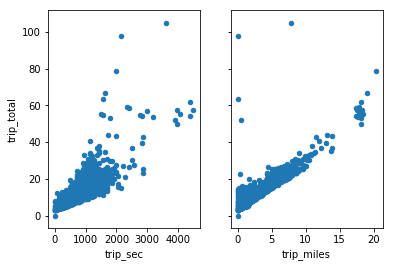

In [56]:
fig, ax = plt.subplots(ncols=2, sharey=True)

NWCab1.plot(kind='scatter', x='trip_sec', y='trip_total', ax=ax[0])
NWCab1.plot(kind='scatter', x='trip_miles', y='trip_total', ax=ax[1])

In [57]:
NWCab1.corr()

,trip_miles,trip_sec,trip_total
trip_miles,1.000000,0.765512,0.885811
trip_sec,0.765512,1.000000,0.824548
trip_total,0.885811,0.824548,1.000000


In [58]:
import numpy as np
from sklearn import linear_model

print('Regression Results', '\n')

miles_total = linear_model.LinearRegression()
miles_total.fit(miles, total);
print('Trip Miles vs. Total Cost')
print('Score:', miles_total.score(miles, total))
pred = miles_total.predict(miles)
print('RMSE:',np.sqrt(((total-pred)**2).sum()/len(pred)),'\n')

time_total = linear_model.LinearRegression()
time_total.fit(time, total);
print('Trip Time (s.)  vs. Total Cost')
print('Score',time_total.score(time, total))
pred = time_total.predict(time)
print('RMSE:',np.sqrt(((total-pred)**2).sum()/len(pred)), '\n')

('Regression Results', '\n')
Trip Miles vs. Total Cost
('Score:', 0.7846618817340903)
('RMSE:', 3.1859710386393614, '\n')
Trip Time (s.)  vs. Total Cost
('Score', 0.679879965397767)
('RMSE:', 3.8845238690834933, '\n')


In [59]:
predt = miles_total.predict(testmiles)
predt1 = time_total.predict(testtime)
print('RMSE for test data\n','Trip Miles',np.sqrt(((testtotal-predt)**2).sum()/len(predt)))
print('','Trip Time (s.)',np.sqrt(((testtotal-predt1)**2).sum()/len(predt1)))

('RMSE for test data\n', 'Trip Miles', 3.230247672853897)
('', 'Trip Time (s.)', 3.513895377458621)


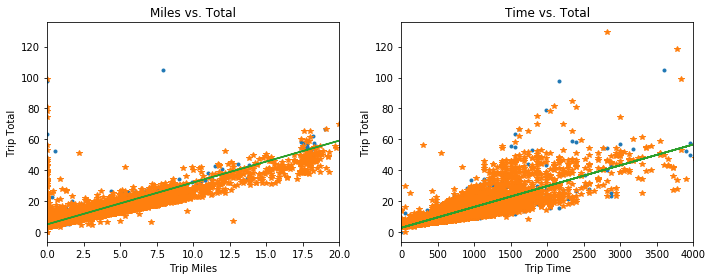

In [60]:
L = miles_total.predict(miles)
L1 = time_total.predict(time)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,4))

ax1.plot(miles,total,'.')
ax1.plot(testmiles,testtotal,'*')
ax1.plot(miles,L)
ax1.set_xlim(xmin=0,xmax=20)
ax1.set_xlabel('Trip Miles')
ax1.set_ylabel('Trip Total')
ax1.set_title('Miles vs. Total')

ax2.plot(time,total,'.')
ax2.plot(testtime,testtotal,'*')
ax2.plot(time,L1)
ax2.set_xlim(xmin=0,xmax=4000)
ax2.set_xlabel('Trip Time')
ax2.set_ylabel('Trip Total')
ax2.set_title('Time vs. Total')

fig.tight_layout()

In [61]:
print('Trip Miles and Time to predict Total','\n')

mtTotal = linear_model.LinearRegression()
mt = np.hstack((miles,time))
mtTotal.fit(mt,total)
pred = mtTotal.predict(mt)
print('Miles/Time','\n','Score:',mtTotal.score(mt,total),'\n','RMSE:', np.sqrt(((total-pred)**2).sum()/len(pred)),'\n')

('Trip Miles and Time to predict Total', '\n')
('Miles/Time', '\n', 'Score:', 0.8364681061979896, '\n', 'RMSE:', 2.776403606628424, '\n')


In [62]:
testmt = np.hstack((testmiles,testtime))

In [63]:
print('(Test Data: 2017) Trip Miles and Time to predict Total','\n')

pred1 = mtTotal.predict(testmt)
print('Miles/Time','\n','Score:',mtTotal.score(testmt,testtotal),'\n','RMSE:', np.sqrt(((testtotal-pred1)**2).sum()/len(pred1)),'\n')

('(Test Date) Trip Miles and Time to predict Total', '\n')
('Miles/Time', '\n', 'Score:', 0.8160689068934652, '\n', 'RMSE:', 2.676657562663727, '\n')
